In [1]:
#Loading IMDB Dataset with the most common 20k words
from tensorflow.keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=20000)
max([max(sequence) for sequence in train_data])

2025-08-18 15:45:09.760377: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


19999

In [2]:
train_data[0] #Each review is a list of word indices
train_labels[0] #positive or negative review

1

In [3]:
#Turn list of integer lists into a multi-hot matrix (#samples × dimension)
#A tensor is needed for a NN
import numpy as np

def multi_hot_encoding_tensors(sequences, dimension):
    tensor_result = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            tensor_result[i, j] = 1
    print(tensor_result.shape)
    return tensor_result

x_train = multi_hot_encoding_tensors(train_data, 20000)
x_test = multi_hot_encoding_tensors(test_data, 20000)
print(x_train[0])



(25000, 20000)
(25000, 20000)
[0. 1. 1. ... 0. 0. 0.]


In [4]:
#vectorization of labels
y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels, dtype='float32')
y_train,  y_test

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

(3, 6)


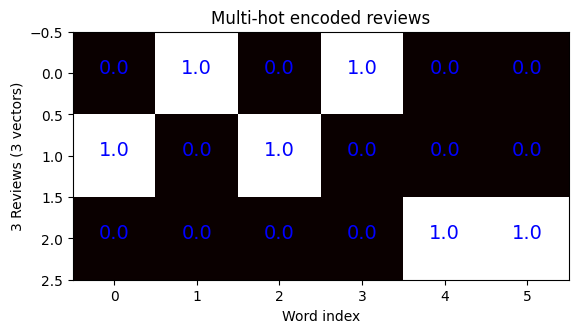

In [5]:
import matplotlib.pyplot as plt
#Visual example for the multi-hot enconding with a toy tensor of 3 reviews and 2 words each
toy = [[1, 3], [0, 2], [4, 5]]
X = multi_hot_encoding_tensors(toy, 6)

plt.imshow(X, cmap="hot", aspect="equal")
for i in range(X.shape[0]): #rows
    for j in range(X.shape[1]): #columns
        plt.text(j,i, str(X[i,j]), ha='center', color='BLUE', fontsize=14)
plt.xlabel("Word index")
plt.ylabel("3 Reviews (3 vectors)")
plt.title("Multi-hot encoded reviews")
plt.show()

In [100]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(1, activation= 'sigmoid'),
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [101]:
#Creating validation dataset
x_validation = x_train[:10000]
x_for_training = x_train[10000:]
y_validation = y_train[:10000]
y_for_training = y_train[10000:]
print(x_for_training.shape)
print(x_validation.shape)

(15000, 20000)
(10000, 20000)


In [102]:
history = model.fit(x_for_training, y_for_training, epochs=4, batch_size=512, validation_data = (x_validation,y_validation))
# Inference + scoring
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7491 - loss: 0.5182 - val_accuracy: 0.8743 - val_loss: 0.3432
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8866 - loss: 0.2957 - val_accuracy: 0.8324 - val_loss: 0.3925
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9268 - loss: 0.2064 - val_accuracy: 0.8647 - val_loss: 0.3321
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9409 - loss: 0.1657 - val_accuracy: 0.8883 - val_loss: 0.2775
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.2930


In [103]:
results

[0.2929784655570984, 0.8815600275993347]

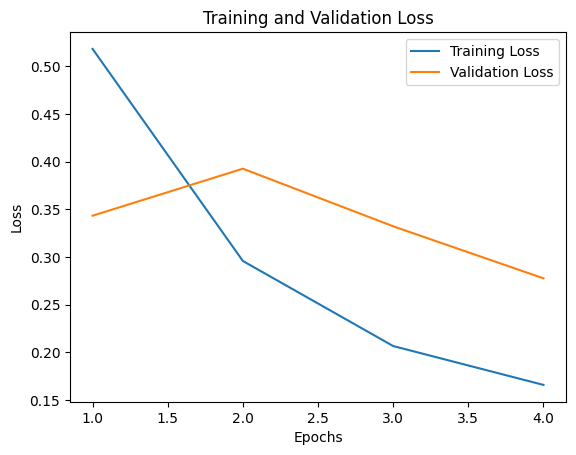

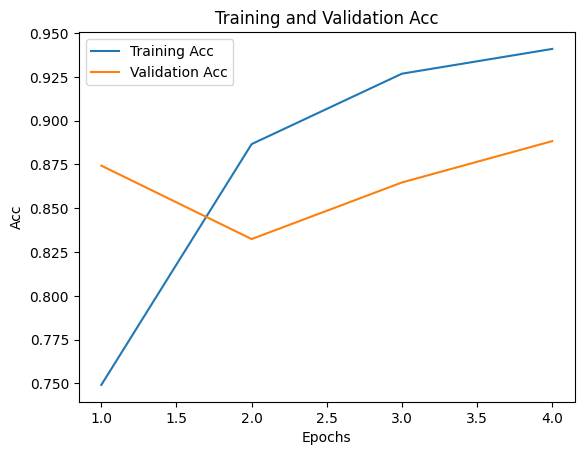

In [104]:
history_dict=history.history
training_loss = history_dict["loss"]
validation_loss = history_dict["val_loss"]
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
epochs=range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, training_acc, label="Training Acc")
plt.plot(epochs, validation_acc, label="Validation Acc")
plt.title("Training and Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()
